### 필요한 라이브러리 Import

In [123]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import os
import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from keras import backend as K

import warnings
warnings.filterwarnings(action='ignore') 

### 데이터 다운로드 및 확인

In [2]:
(x_train_10000, y_train_10000), (x_test_10000, y_test_10000) = reuters.load_data(num_words=10000, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train_10000)))
print('테스트 샘플의 수: {}'.format(len(x_test_10000)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [4]:
print(x_train_10000[0])
print(x_test_10000[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [5]:
print(y_train_10000[0])
print(y_test_10000[0])

3
3


In [6]:
num_classes = max(y_train_10000) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


* 뉴스 길이 시각화

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


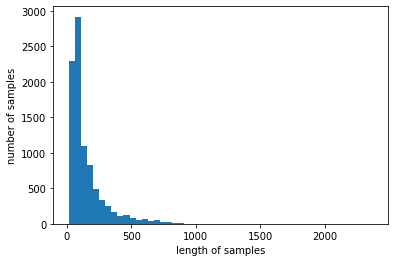

In [7]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train_10000)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train_10000))/len(x_train_10000)))

plt.hist([len(s) for s in x_train_10000], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

* 클래스별 시각화

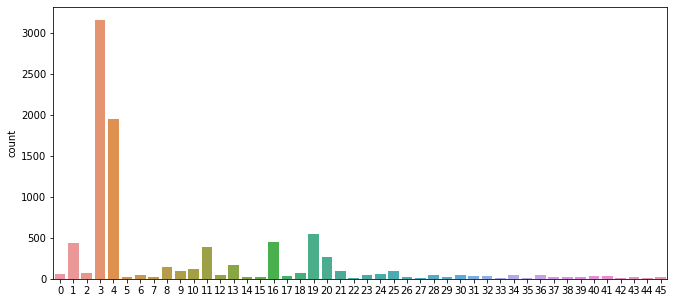

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train_10000)
plt.show()

In [9]:
unique_elements, counts_elements = np.unique(y_train_10000, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

557056/550378 [==============================] - 0s 0us/step
=3


In [11]:
word_index['the']

1

In [12]:
word_index['it']

13

In [13]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [14]:
print(index_to_word[4])
print(index_to_word[16])

the
it


* word_index에 입력으로 했을 때, 얻는 숫자보다는 +3을 한 숫자가 원래 고유한 숫자입니다. 이건 로이터 뉴스 데이터가 정의한 일종의 약속입니다.

In [15]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


### 뉴스 복원

In [16]:
print(' '.join([index_to_word[index] for index in x_train_10000[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [17]:
sentence = [4, 587, 23, 133, 6, 30, 515]

print(' '.join([index_to_word[index] for index in sentence]))

the transaction is expected to be completed


In [18]:
decoded = []
for i in range(len(x_train_10000)):
    t = ' '.join([index_to_word[index] for index in x_train_10000[i]])
    decoded.append(t)

x_train_10000 = decoded
print(len(x_train_10000))

8982


In [19]:
decoded = []
for i in range(len(x_test_10000)):
    t = ' '.join([index_to_word[index] for index in x_test_10000[i]])
    decoded.append(t)

x_test_10000 = decoded
print(len(x_test_10000))

2246


In [20]:
x_train_10000[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [21]:
x_test_10000[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

* 데이터 벡터화

In [22]:
def dtm(x_train, x_test):
    dtmvector = CountVectorizer()
    tfidf_transformer = TfidfTransformer()
    
    x_train_dtm = dtmvector.fit_transform(x_train)
    x_train_tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
    
    x_test_dtm = dtmvector.transform(x_test)
    x_test_tfidfv = tfidf_transformer.transform(x_test_dtm)
    
    print('shape of x_train_dtm: ', x_train_dtm.shape)
    print('shape of x_train_tfidfv: ', x_train_tfidfv.shape)
    print('shape of x_test_dtm: ', x_test_dtm.shape)
    print('shape of x_test_tfidfv: ', x_test_tfidfv.shape)
    
    return x_train_tfidfv, x_test_tfidfv

In [23]:
tfidfv_train_10000, tfidfv_test_10000 = dtm(x_train_10000, x_test_10000)

shape of x_train_dtm:  (8982, 9670)
shape of x_train_tfidfv:  (8982, 9670)
shape of x_test_dtm:  (2246, 9670)
shape of x_test_tfidfv:  (2246, 9670)


* 각 모델별 예측값을 출력하는 함수를 만들겠습니다.

In [24]:
def model_predict(tfidfv_train, y_train, tfidfv_test, y_test):
    
    '''MultinomialNB''' 
    nb = MultinomialNB()
    nb.fit(tfidfv_train, y_train)
    
    nb_predicted = nb.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("MultinomialNB 정확도:", accuracy_score(y_test, nb_predicted)) #예측값과 실제값 비교
    print("MultinomialNB f1:", f1_score(y_test, nb_predicted, average="micro"))
    print("--------------------------------------------------------")
    '''ComplementNB'''
    cb = ComplementNB()
    cb.fit(tfidfv_train, y_train)
    
    cb_predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("ComplementNB 정확도:", accuracy_score(y_test, cb_predicted)) #예측값과 실제값 비교
    print("ComplementNB f1:", f1_score(y_test, cb_predicted, average="micro"))
    print("--------------------------------------------------------")
    '''LogisticRegression'''
    lr = LogisticRegression(C=10000, penalty='l2')
    lr.fit(tfidfv_train, y_train)
    
    lr_predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("LogisticRegression 정확도:", accuracy_score(y_test, lr_predicted)) #예측값과 실제값 비교
    print("LogisticRegression f1:", f1_score(y_test, cb_predicted, average="micro"))
    print("--------------------------------------------------------")
    '''LinearSVC'''
    lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
    lsvc.fit(tfidfv_train, y_train)
    
    lsvc_predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("LinearSVC 정확도:", accuracy_score(y_test, lsvc_predicted)) #예측값과 실제값 비교
    print("LinearSVC f1:", f1_score(y_test, cb_predicted, average="micro"))
    print("--------------------------------------------------------")
    '''DecisionTreeClassifier'''
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(tfidfv_train, y_train)

    tree_predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("DecisionTreeClassifier 정확도:", accuracy_score(y_test, tree_predicted)) #예측값과 실제값 비교
    print("DecisionTreeClassifier f1:", f1_score(y_test, cb_predicted, average="micro"))
    print("--------------------------------------------------------")
    '''RandomForestClassifier'''
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidfv_train, y_train)

    forest_predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("RandomForestClassifier 정확도:", accuracy_score(y_test, forest_predicted)) #예측값과 실제값 비교
    print("RandomForestClassifier f1:", f1_score(y_test, cb_predicted, average="micro"))
    print("--------------------------------------------------------")
    '''GradientBoostingClassifier'''
    grbt = GradientBoostingClassifier(random_state=0) # verbose=3
    grbt.fit(tfidfv_train, y_train)

    grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("GradientBoostingClassifier 정확도:", accuracy_score(y_test, grbt_predicted)) #예측값과 실제값 비교 
    print("GradientBoostingClassifier f1:", f1_score(y_test, cb_predicted, average="micro"))
    print("--------------------------------------------------------")
    '''VotingClassifier'''
    voting_classifier = VotingClassifier(estimators=[
        ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
        ], voting='soft', n_jobs=-1)
    voting_classifier.fit(tfidfv_train, y_train)
    
    voting_classifier_predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("VotingClassifier 정확도:", accuracy_score(y_test, voting_classifier_predicted)) #예측값과 실제값 비교
    print("VotingClassifier f1:", f1_score(y_test, cb_predicted, average="micro"))
    
    return {'MultinomialNB': nb, 'ComplementNB': cb, 'LogisticRegression': lr,   
             'LinearSVC': lsvc, 'DecisionTreeClassifier': tree, 'RandomForestClassifier': forest,
             'GradientBoostingClassifier': grbt, 'VotingClassifier': voting_classifier}

In [25]:
model_dict_10000 = model_predict(tfidfv_train_10000, y_train_10000, tfidfv_test_10000, y_test_10000)

MultinomialNB 정확도: 0.6567230632235085
MultinomialNB f1: 0.6567230632235085
--------------------------------------------------------
ComplementNB 정확도: 0.7707034728406055
ComplementNB f1: 0.7707034728406055
--------------------------------------------------------
LogisticRegression 정확도: 0.8076580587711487
LogisticRegression f1: 0.7707034728406055
--------------------------------------------------------
LinearSVC 정확도: 0.7756010685663401
LinearSVC f1: 0.7707034728406055
--------------------------------------------------------
DecisionTreeClassifier 정확도: 0.6202137132680321
DecisionTreeClassifier f1: 0.7707034728406055
--------------------------------------------------------
RandomForestClassifier 정확도: 0.674087266251113
RandomForestClassifier f1: 0.7707034728406055
--------------------------------------------------------
GradientBoostingClassifier 정확도: 0.7666963490650045
GradientBoostingClassifier f1: 0.7707034728406055
--------------------------------------------------------
VotingClassifie

In [26]:
x_test_10000[3]

'<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [27]:
y_test_10000[3]

4

* 시각화

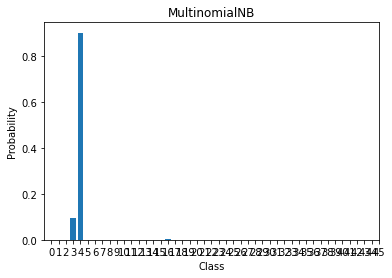

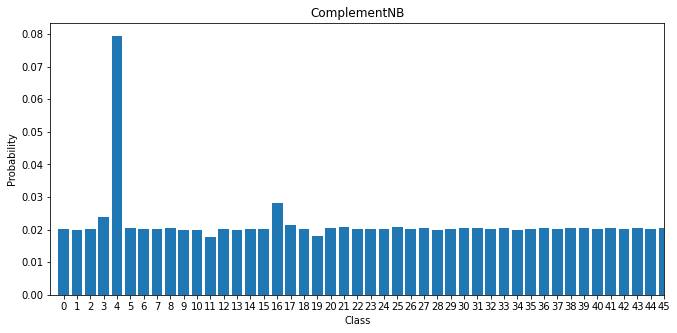

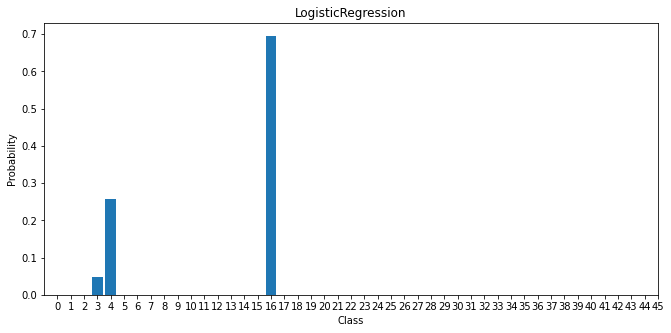

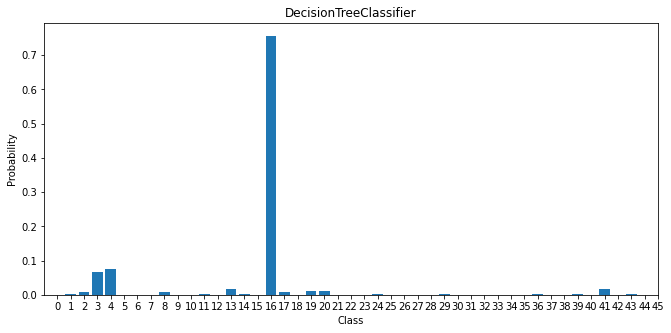

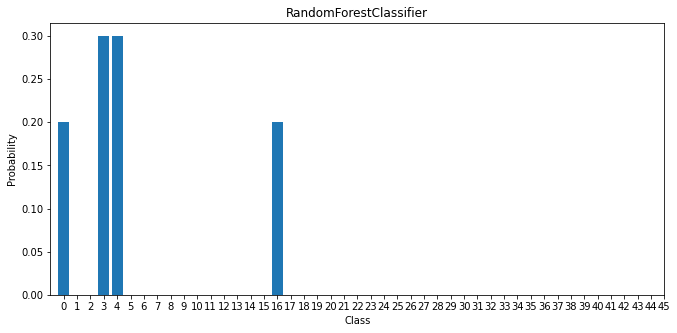

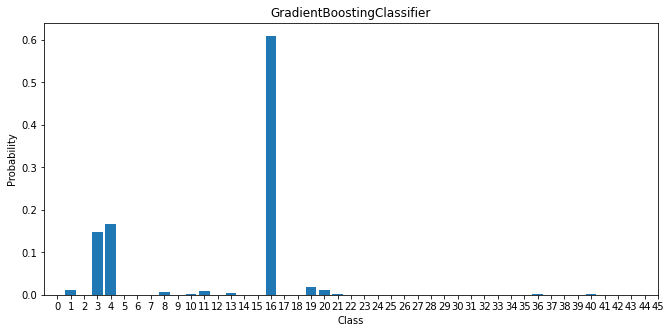

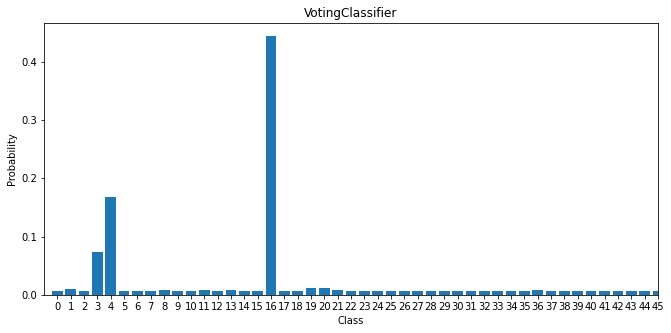

In [28]:
for name, model in model_dict_10000.items():
    if name == 'LinearSVC': # LinearSVC는 predict_proba를 지원하지 않습니다
        continue
    probability_3 = model.predict_proba(tfidfv_test_10000[3])[0]
    plt.title(name)
    plt.rcParams["figure.figsize"] = (11,5)
    plt.bar(model.classes_, probability_3)
    plt.xlim(-1, 21)
    plt.xticks(model.classes_)
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.show()

In [29]:
for name, model in model_dict_10000.items():
    print(name)
    model.predict(tfidfv_test_10000[3])
    print(classification_report(y_test_10000, model.predict(tfidfv_test_10000), zero_division=0))
    print('------------------------------------------------------')

MultinomialNB
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17 

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.77      0.68      0.72       105
           2       0.78      0.70      0.74        20
           3       0.88      0.91      0.89       813
           4       0.76      0.83      0.79       474
           5       0.50      0.20      0.29         5
           6       0.80      0.86      0.83        14
           7       1.00      0.33      0.50         3
           8       0.64      0.66      0.65        38
           9       0.74      0.80      0.77        25
          10       0.90      0.87      0.88        30
          11       0.63      0.64      0.63        83
          12       0.33      0.46      0.39        13
          13       0.62      0.49      0.55        37
          14       0.14      0.50      0.22         2
          15       0.38      0.33      0.35         9
          16       0.73      0.73      0.73        99
          17       0.27    

In [30]:
def graph_confusion_matrix(name, model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(8,8))
  heatmap = sns.heatmap(df_cm, center = 600, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.title(name)
  plt.ylabel('label')
  plt.xlabel('predicted value')

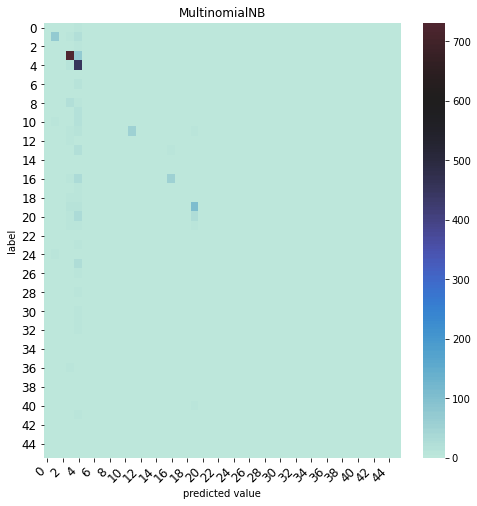

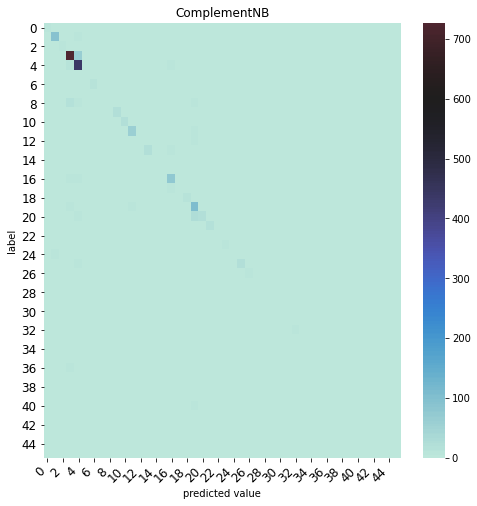

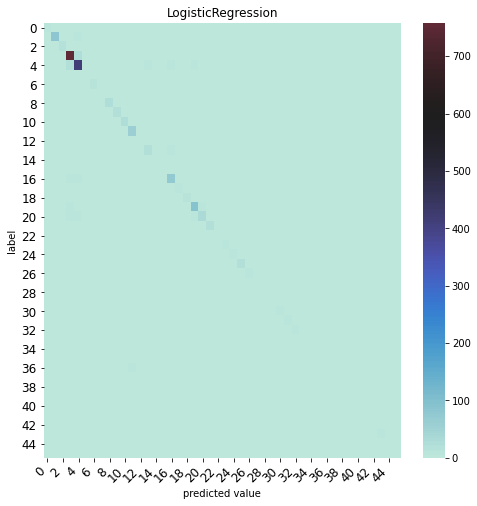

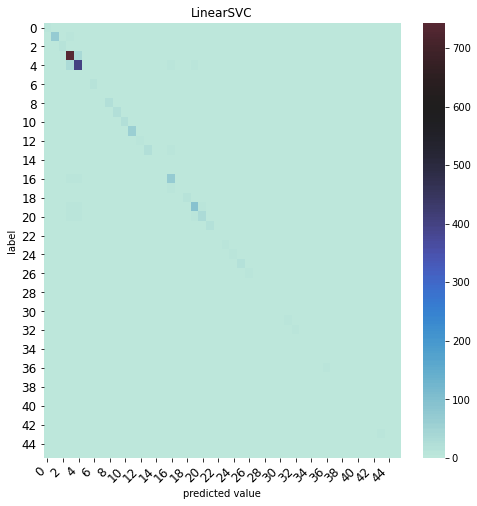

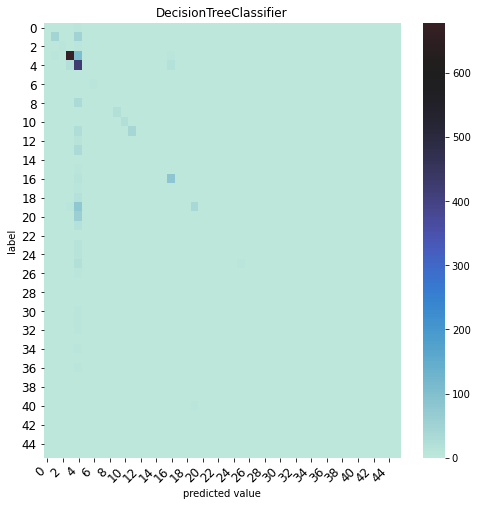

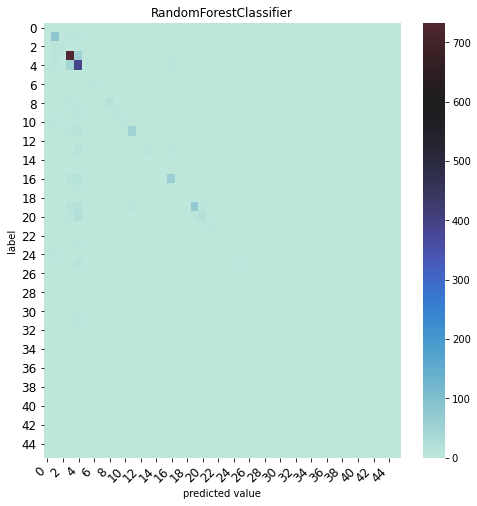

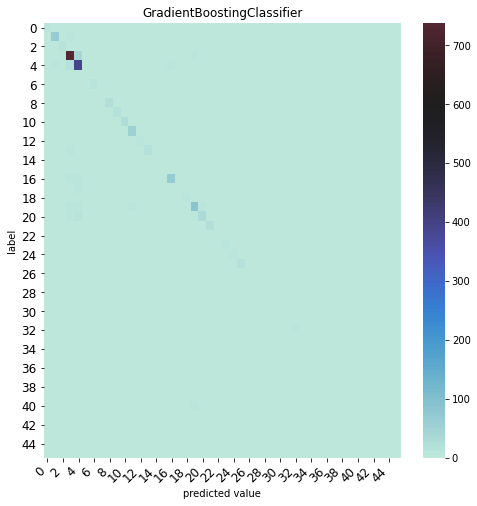

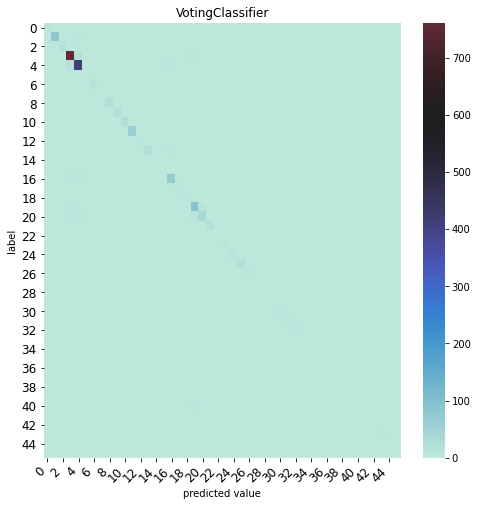

In [31]:
for name, model in model_dict_10000.items():
    graph_confusion_matrix(name, model, tfidfv_test_10000, y_test_10000)

* 단어장 5000

In [32]:
(x_train_5000, y_train_5000), (x_test_5000, y_test_5000) = reuters.load_data(num_words=5000, test_split=0.2)

In [33]:
decoded = []
for i in range(len(x_train_5000)):
    t = ' '.join([index_to_word[index] for index in x_train_5000[i]])
    decoded.append(t)

x_train_5000 = decoded
print(len(x_train_5000))

decoded = []
for i in range(len(x_test_5000)):
    t = ' '.join([index_to_word[index] for index in x_test_5000[i]])
    decoded.append(t)

x_test_5000 = decoded
print(len(x_test_5000))

8982
2246


In [34]:
tfidfv_train_5000, tfidfv_test_5000 = dtm(x_train_5000, x_test_5000)

shape of x_train_dtm:  (8982, 4867)
shape of x_train_tfidfv:  (8982, 4867)
shape of x_test_dtm:  (2246, 4867)
shape of x_test_tfidfv:  (2246, 4867)


In [35]:
model_dict_5000 = model_predict(tfidfv_train_5000, y_train_5000, tfidfv_test_5000, y_test_5000)

MultinomialNB 정확도: 0.6731967943009796
MultinomialNB f1: 0.6731967943009796
--------------------------------------------------------
ComplementNB 정확도: 0.7707034728406055
ComplementNB f1: 0.7707034728406055
--------------------------------------------------------
LogisticRegression 정확도: 0.8058771148708815
LogisticRegression f1: 0.7707034728406055
--------------------------------------------------------
LinearSVC 정확도: 0.7711487088156723
LinearSVC f1: 0.7707034728406055
--------------------------------------------------------
DecisionTreeClassifier 정확도: 0.6179875333926982
DecisionTreeClassifier f1: 0.7707034728406055
--------------------------------------------------------
RandomForestClassifier 정확도: 0.701246660730187
RandomForestClassifier f1: 0.7707034728406055
--------------------------------------------------------
GradientBoostingClassifier 정확도: 0.767586821015138
GradientBoostingClassifier f1: 0.7707034728406055
--------------------------------------------------------
VotingClassifier

* 단어장 All

In [36]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [37]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

8982
2246


In [38]:
tfidfv_train, tfidfv_test = dtm(x_train, x_test)

shape of x_train_dtm:  (8982, 26506)
shape of x_train_tfidfv:  (8982, 26506)
shape of x_test_dtm:  (2246, 26506)
shape of x_test_tfidfv:  (2246, 26506)


In [39]:
model_dict = model_predict(tfidfv_train, y_train, tfidfv_test, y_test)

MultinomialNB 정확도: 0.5997328584149599
MultinomialNB f1: 0.5997328584149599
--------------------------------------------------------
ComplementNB 정확도: 0.7649154051647373
ComplementNB f1: 0.7649154051647373
--------------------------------------------------------
LogisticRegression 정확도: 0.813446126447017
LogisticRegression f1: 0.7649154051647373
--------------------------------------------------------
LinearSVC 정확도: 0.7809439002671416
LinearSVC f1: 0.7649154051647373
--------------------------------------------------------
DecisionTreeClassifier 정확도: 0.6211041852181657
DecisionTreeClassifier f1: 0.7649154051647373
--------------------------------------------------------
RandomForestClassifier 정확도: 0.6544968833481746
RandomForestClassifier f1: 0.7649154051647373
--------------------------------------------------------
GradientBoostingClassifier 정확도: 0.7702582368655387
GradientBoostingClassifier f1: 0.7649154051647373
--------------------------------------------------------
VotingClassifie

In [41]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
    
print(len(index_to_word))

30982


* 딥러닝 모델을 위해 단어장의 숫자를 확인해봤습니다.

* f1_score를 출력하기 위해 튜닝했습니다.

In [127]:
def recall(y_target, y_pred):
    count_true_positive = K.sum(K.round(K.clip(y_target * y_pred, 0, 1))) 

    count_true_positive_false_negative = K.sum(K.round(K.clip(y_target, 0, 1)))
    
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())
    
    return recall


def precision(y_target, y_pred):
    count_true_positive = K.sum(K.round(K.clip(y_target * y_pred, 0, 1))) 

    count_true_positive_false_positive = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    return precision


def f1_score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    _f1score =  2 * ((_recall * _precision) / (_recall + _precision+ K.epsilon()))
    return _f1score

* 모델 함수 정의

In [131]:
def CNN_model(vocab_size):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size, 128, input_shape=(None,)))
    model.add(tf.keras.layers.Conv1D(128, 16, activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(4))
    model.add(tf.keras.layers.Conv1D(128, 16, activation='relu'))
    model.add(tf.keras.layers.GlobalMaxPooling1D())
    model.add(tf.keras.layers.Dense(46, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1_score])
    return model

* 데이터 다운로드 및 전처리

In [140]:
(x_train_10000, y_train_10000), (x_test_10000, y_test_10000) = reuters.load_data(num_words=10000, test_split=0.2)
(x_train_5000, y_train_5000), (x_test_5000, y_test_5000) = reuters.load_data(num_words=5000, test_split=0.2)
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

* 길이의 평균이 145였는데 비슷하게 max_len을 정했습니다.

In [142]:
max_len = 150

x_train_10000 = pad_sequences(x_train_10000, maxlen=max_len, padding="pre")
x_test_10000 = pad_sequences(x_test_10000, maxlen=max_len, padding="pre")

x_train_5000 = pad_sequences(x_train_5000, maxlen=max_len, padding="pre")
x_test_5000 = pad_sequences(x_test_5000, maxlen=max_len, padding="pre")

x_train = pad_sequences(x_train, maxlen=max_len, padding="pre")
x_test = pad_sequences(x_test, maxlen=max_len, padding="pre")

y_train_10000 = to_categorical(y_train_10000)
y_test_10000 = to_categorical(y_test_10000)

y_train_5000 = to_categorical(y_train_5000)
y_test_5000 = to_categorical(y_test_5000)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [143]:
x_train_10000, x_val_10000, y_train_10000, y_val_10000 = train_test_split(x_train_10000, y_train_10000, test_size = 0.2, shuffle=True, random_state=5)
x_train_5000, x_val_5000, y_train_5000, y_val_5000 = train_test_split(x_train_5000, y_train_5000, test_size = 0.2, shuffle=True, random_state=5)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, shuffle=True, random_state=5)

In [144]:
file_path = os.getenv('HOME') +  '/aiffel'

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint(file_path + '/model/best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

* 모델 학습

In [145]:
model = CNN_model(10000)

epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(x_train_10000, y_train_10000,
                    epochs=epochs, batch_size=64, verbose=1,
                    validation_data=(x_val_10000, y_val_10000),
                    callbacks = [es, mc])

Epoch 1/20
90/90 [==============================] - 9s 97ms/step - loss: 2.5101 - accuracy: 0.3774 - f1_score: 0.2810 - val_loss: 1.6870 - val_accuracy: 0.5498 - val_f1_score: 0.6314

Epoch 00001: val_accuracy improved from -inf to 0.54976, saving model to /aiffel/aiffel/model/best_model.h5
Epoch 2/20
90/90 [==============================] - 2s 27ms/step - loss: 1.5280 - accuracy: 0.6038 - f1_score: 0.6631 - val_loss: 1.4441 - val_accuracy: 0.6625 - val_f1_score: 0.6811

Epoch 00002: val_accuracy improved from 0.54976 to 0.66249, saving model to /aiffel/aiffel/model/best_model.h5
Epoch 3/20
90/90 [==============================] - 2s 27ms/step - loss: 1.1051 - accuracy: 0.7287 - f1_score: 0.7816 - val_loss: 1.4437 - val_accuracy: 0.6527 - val_f1_score: 0.6853

Epoch 00003: val_accuracy did not improve from 0.66249
Epoch 4/20
90/90 [==============================] - 2s 27ms/step - loss: 0.8172 - accuracy: 0.7873 - f1_score: 0.8302 - val_loss: 1.4434 - val_accuracy: 0.6688 - val_f1_score

In [149]:
model.evaluate(x_test_10000, y_test_10000)

71/71 [==============================] - 4s 29ms/step - loss: 1.7649 - accuracy: 0.6768 - f1_score: 0.6932


[1.7648515701293945, 0.6767587065696716, 0.6932342052459717]

In [153]:
model = CNN_model(5000)

epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(x_train_5000, y_train_5000,
                    epochs=epochs, batch_size=64, verbose=1,
                    validation_data=(x_val_5000, y_val_5000),
                    callbacks = [es, mc])

Epoch 1/20
90/90 [==============================] - 3s 26ms/step - loss: 2.4729 - accuracy: 0.3811 - f1_score: 0.2700 - val_loss: 1.6398 - val_accuracy: 0.5776 - val_f1_score: 0.6352

Epoch 00001: val_accuracy did not improve from 0.70912
Epoch 2/20
90/90 [==============================] - 2s 24ms/step - loss: 1.4499 - accuracy: 0.6195 - f1_score: 0.6702 - val_loss: 1.4334 - val_accuracy: 0.6632 - val_f1_score: 0.6710

Epoch 00002: val_accuracy did not improve from 0.70912
Epoch 3/20
90/90 [==============================] - 2s 23ms/step - loss: 1.1095 - accuracy: 0.7239 - f1_score: 0.7593 - val_loss: 1.2978 - val_accuracy: 0.6980 - val_f1_score: 0.7233

Epoch 00003: val_accuracy did not improve from 0.70912
Epoch 4/20
90/90 [==============================] - 2s 24ms/step - loss: 0.7954 - accuracy: 0.7985 - f1_score: 0.8372 - val_loss: 1.3250 - val_accuracy: 0.6966 - val_f1_score: 0.7206

Epoch 00004: val_accuracy did not improve from 0.70912
Epoch 5/20
90/90 [==========================

In [154]:
model.evaluate(x_test_5000, y_test_5000)

71/71 [==============================] - 0s 5ms/step - loss: 1.5114 - accuracy: 0.7035 - f1_score: 0.7233


[1.5113656520843506, 0.7034728527069092, 0.7233133316040039]

In [155]:
model = CNN_model(30982)

epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(x_train, y_train,
                    epochs=epochs, batch_size=64, verbose=1,
                    validation_data=(x_val, y_val),
                    callbacks = [es, mc])

Epoch 1/20
90/90 [==============================] - 5s 48ms/step - loss: 2.4602 - accuracy: 0.3878 - f1_score: 0.2903 - val_loss: 1.7184 - val_accuracy: 0.5379 - val_f1_score: 0.6197

Epoch 00001: val_accuracy did not improve from 0.70981
Epoch 2/20
90/90 [==============================] - 4s 45ms/step - loss: 1.5652 - accuracy: 0.5701 - f1_score: 0.6450 - val_loss: 1.4883 - val_accuracy: 0.6514 - val_f1_score: 0.6673

Epoch 00002: val_accuracy did not improve from 0.70981
Epoch 3/20
90/90 [==============================] - 5s 54ms/step - loss: 1.0980 - accuracy: 0.7241 - f1_score: 0.7664 - val_loss: 1.4256 - val_accuracy: 0.6778 - val_f1_score: 0.7126

Epoch 00003: val_accuracy did not improve from 0.70981
Epoch 4/20
90/90 [==============================] - 4s 44ms/step - loss: 0.7518 - accuracy: 0.7974 - f1_score: 0.8457 - val_loss: 1.4283 - val_accuracy: 0.6938 - val_f1_score: 0.7102

Epoch 00004: val_accuracy did not improve from 0.70981
Epoch 5/20
90/90 [==========================

In [156]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 5ms/step - loss: 1.6855 - accuracy: 0.6843 - f1_score: 0.7026


[1.685495138168335, 0.6843277215957642, 0.7025628089904785]

* 결과표

|모델|acc|5000|10000|all|f1_score|5000|10000|all|
|-----|----|----|----|----|----|----|----|----|
|MultinomialNB|acc|0.67|0.65|0.59|f1_score|0.67|0.65|0.59|
|ComplementNB|acc|0.77|0.77|0.76|f1_score|0.77|0.77|0.76|
|LogisticRegression|acc|0.80|0.80|0.81|f1_score|0.77|0.77|0.76|
|LinearSVC|acc|0.77|0.77|0.78|f1_score|0.77|0.77|0.76|
|DecisionTreeClassifier|acc|0.61|0.62|0.62|f1_score|0.77|0.77|0.76|
|RandomForestClassifier|acc|0.70|0.67|0.65|f1_score|0.77|0.77|0.76|
|GradientBoostingClassifier|acc|0.76|0.76|0.77|f1_score|0.77|0.77|0.76|
|VotingClassifier|acc|0.81|0.81|0.81|f1_score|0.77|0.77|0.76|
|CNN|acc|0.70|0.70|0.68|f1_score|0.72|0.72|0.70|

### 회고
* 가장 인상깊었던 점은 f1_score 함수를 벨로그에서 보고 그대로 사용했지만 오류가 났습니다.<br/> 알고보니 타겟과 예측값의 순서가 잘못되어서 그것만 수정했더니 잘 돌아갔습니다.
* 캐글에서는 f1_score를 중요하게 여긴다고 들은것 같은데 확실히 이런 데이터 불균형이 있는 경우에는 f1_score가 더 신뢰성이 있다고 생각합니다.
* 대부분의 모델이 단어가 5000개일때 더 성능이 좋았지만 로지스틱, 서포트벡터 등은 단어장이 많아질수록 성능이 좋아 상황별로 단어장을 잘 성정해야 할것 같습니다.